<a href="https://colab.research.google.com/github/ShaiSundar511/dash-heroku/blob/main/5_2_time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Essential Libraries

In [1]:
# python visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go

# Ref
https://towardsdatascience.com/a-complete-guide-to-time-series-data-visualization-in-python-da0ddd2cfb01

#How to Import Time Series in Python?
In read_csv() function, set parse_dates = True, to convert the ‘Date’ column to DateTimeIndex


In [6]:
df_stock = pd.read_csv('/content/AAPL.csv', parse_dates=True, index_col = "Date")


# adding Date as column and index
df_stock['Date'] = df_stock.index

df = df_stock

# adding daily interval
df.index = pd.DatetimeIndex(df.index).to_period('D')

# display
display(df_stock.head())
display(df_stock.tail())

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2010-04-19,8.822500,8.853214,8.634643,8.823929,7.555702,566924400,2010-04-19
2010-04-20,8.876429,8.901786,8.677143,8.735357,7.479861,738326400,2010-04-20
2010-04-21,9.242857,9.294643,9.133214,9.257857,7.927264,982391200,2010-04-21
2010-04-22,9.222857,9.526786,9.150000,9.516786,8.148975,793424800,2010-04-22
2010-04-23,9.571071,9.720714,9.535714,9.672500,8.282313,796955600,2010-04-23


,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2022-04-08,171.779999,171.779999,169.199997,170.089996,170.089996,76515900,2022-04-08
2022-04-11,168.710007,169.029999,165.500000,165.750000,165.750000,72246700,2022-04-11
2022-04-12,168.020004,169.869995,166.639999,167.660004,167.660004,79265200,2022-04-12
2022-04-13,167.389999,171.039993,166.770004,170.399994,170.399994,70618900,2022-04-13
2022-04-14,170.619995,171.270004,165.039993,165.289993,165.289993,75237500,2022-04-14


# Quick Plot

In [7]:
fig = px.line(
    data_frame = df_stock, 
    x='Date', 
    y='Open', 
    title='Stock price (Open)'
)

fig.show()

In [8]:
fig = px.area(
    data_frame = df_stock, 
    x='Date', 
    y='High', 
    title='Stock price (High)'
)

fig.show()

# Plotting all columns

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2379a00c10>,
      dtype=object)

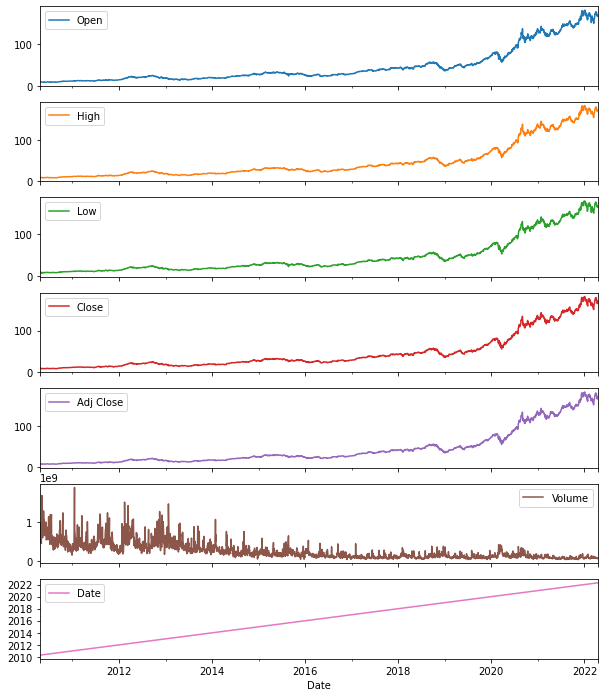

In [9]:
df.plot(subplots = True, figsize = (10, 12))

# Plotting multiple traces
Previously, plotting multiple traces was difficult. One has to use Plotly's Go library and call add_traces function. Or, they need to melt multiple columns in to one (known as long-format).

But recently, it has been easier in Plotly Express-- one needs to pass a list in 'y'.

More: # https://plotly.com/python/wide-form/

Below, these three approaches are shown one by one

## Solution (i)

Stock price with range slider Visualization

In [59]:
fig = px.line( # you can also use 'px.area'
    data_frame = df_stock, 
    x= 'Date', #df_stock.index, # changed from column 'Date' to index Date, 
    y='High', title='Stock price (High) with Rangeslider and RangeSliders'
)

# Add rangeslider
fig.update_xaxes(        
    # add attribute rangeslider_visible (doc: https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-rangeselector)    
    rangeslider_visible = True,

    # next, add rangeselector with rangeselector_buttons (doc: https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-rangeselector-buttons)
    rangeselector_buttons = list(
        #list begin
        [          
         # Each dictionary item below indicates a filter button. Dictionary keys (e.g., count, label, step, stepmode) are described in rangeselector_buttons's documnetation
          dict(count = 3,  label = "1Q", step = "month", stepmode = "backward"), # button 1
          dict(count = 4,  label = "2Q", step = "month", stepmode = "backward"), # button 2
          dict(count = 8,  label = "3Q", step = "month", stepmode = "backward"), # button 3
          dict(count = 12, label = "4Q", step = "month", stepmode = "backward"), # button 4
          dict(step="all")                                                       # button 5
        ] 
        # list end    
    )
)

# show figure
fig.show()

# Solution (ii)

Range Slider with 5-Day Moving average

In [68]:
# window size or lag = 5
window_size = 5
df_rolling = df['Open'].rolling(window = window_size).mean()
display(df_rolling.head())

Date
2010-04-19         NaN
2010-04-20         NaN
2010-04-21         NaN
2010-04-22         NaN
2010-04-23    9.147143
Freq: D, Name: Open, dtype: float64

In [69]:
# replace missing values
df_rolling = df_rolling.fillna(df_rolling.mean())
display(df_rolling.head())

Date
2010-04-19    46.474763
2010-04-20    46.474763
2010-04-21    46.474763
2010-04-22    46.474763
2010-04-23     9.147143
Freq: D, Name: Open, dtype: float64

In [70]:
## visualize the orginal and sliding window 

fig = go.Figure()

fig.add_trace(go.Scatter(x = df['Date'], y = df_rolling, name="moving average"))
fig.add_trace(go.Scatter(x = df['Date'],y = df['Open'], name="original"))    

fig.update_xaxes(        
    # add attribute rangeslider_visible (doc: https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-rangeselector)    
    rangeslider_visible = True,

    # next, add rangeselector with rangeselector_buttons (doc: https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-rangeselector-buttons)
    rangeselector_buttons = list(
        #list begin
        [          
         # Each dictionary item below indicates a filter button. Dictionary keys (e.g., count, label, step, stepmode) are described in rangeselector_buttons's documnetation
          dict(count = 3,  label = "1Q", step = "month", stepmode = "backward"), # button 1
          dict(count = 4,  label = "2Q", step = "month", stepmode = "backward"), # button 2
          dict(count = 8,  label = "3Q", step = "month", stepmode = "backward"), # button 3
          dict(count = 12, label = "4Q", step = "month", stepmode = "backward"), # button 4
          dict(step="all")                                                       # button 5
        ] 
        # list end    
    )
)

fig.show()